# Table of contents:
## 1. Importing Data and Libraries
## 2. Creating visualization to show the distribution of profiles:
- Distribution of Family Profiles
- Basic stats for Family Profile
- Comparing customer profiles with regions and departments
- Family Profile Distribution by Region
- Family Profile Distribution by Department
- Income (income_group) distribution stats
- Income (income_group) Distribution
- Income (income_group) By Region
- Income Group Distribution by Department
- Distribution of Age Groups
- Age Group by Region
- Age Group by Department
- Most Requested Departments
- Departments by Region

# Importing Data & Libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib as mpl

In [2]:
# define path
path =r"C:\Users\repla\Documents"

In [4]:
# Import Data
df = pd.read_pickle(r"C:\Users\repla\Documents\02 Data\Prepared Data\df_active_customers_4_10.pkl")

In [5]:
# Removing the limit to columns displayed 
pd.set_option('display.max_columns', None)

In [6]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,time_of_order,days_since_prior_order,add_to_cart_order,reordered,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_orders,order_frequency_flag,mean_expenses,gender,state,age,date_joined,n_dependants,fam_status,income,region,activity_flag,age_group,income_group,department,dependants_group,family_profile
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,30,Regular customer,12.900000,High spender,6.5,Frequent customer,5.8,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,active customer,60-81 years old,Low Income,snacks,Has dependants,married male with children
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders,30,Regular customer,12.900000,High spender,6.5,Frequent customer,5.8,Male,Minnesota,81,2019-08-01,1,married,49620,Midwest,active customer,60-81 years old,Low Income,snacks,Has dependants,married male with children
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,Mid-range product,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,5.288889,Low spender,7.0,Frequent customer,5.8,Female,Vermont,66,2018-06-16,2,married,158302,Northeast,active customer,60-81 years old,High Income,snacks,Has dependants,married female with children
3,955,Cheddar Chex Mix,125,19,3.9,147387,709,4,0,21,8.0,30,0,Low-range product,Low-range product,Busiest day,Busiest days,Average orders,5,New customer,5.288889,Low spender,7.0,Frequent customer,3.9,Female,Vermont,66,2018-06-16,2,married,158302,Northeast,active customer,60-81 years old,High Income,snacks,Has dependants,married female with children
4,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,7,0,Mid-range product,Mid-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,5.800000,Low spender,26.0,Non-frequent customer,5.8,Female,Hawaii,51,2019-01-04,2,married,57797,West,active customer,45-59 years old,Low Income,snacks,Has dependants,married female with children


In [7]:
# Answering Key Question: Are there certain types of products that are more popular than others? 
# The marketing and sales teams want to know which departments have the highest frequency of product orders.


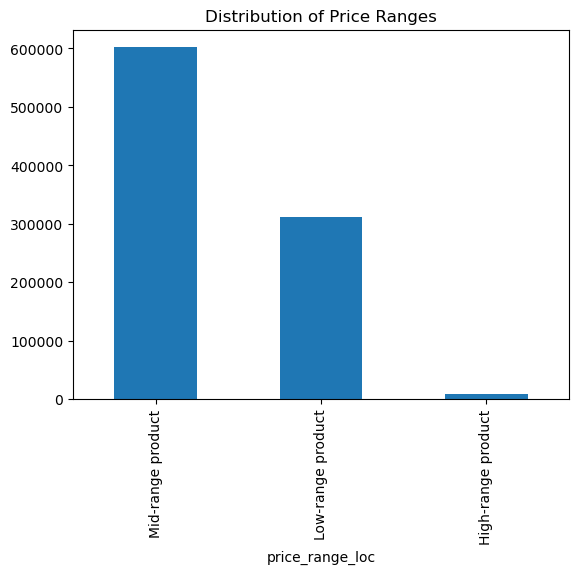

In [8]:
# Price range visual created from 'price_range_loc' grouping
price_range_bar = df['price_range_loc'].value_counts().plot.bar(title = 'Distribution of Price Ranges')

Text(0.5, 1.0, 'Orders by Department')

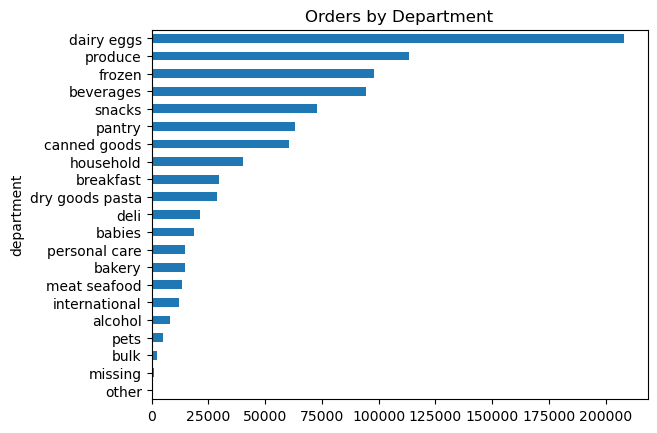

In [10]:
department_frequency = df['department'].value_counts().sort_values(ascending=True).plot.barh()
plt.title("Orders by Department")

In [12]:
department_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_frequency.png'))

In [13]:
price_range_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Distribution_of_Price_Ranges.png'))

In [14]:
# creating brand loyalty visuals

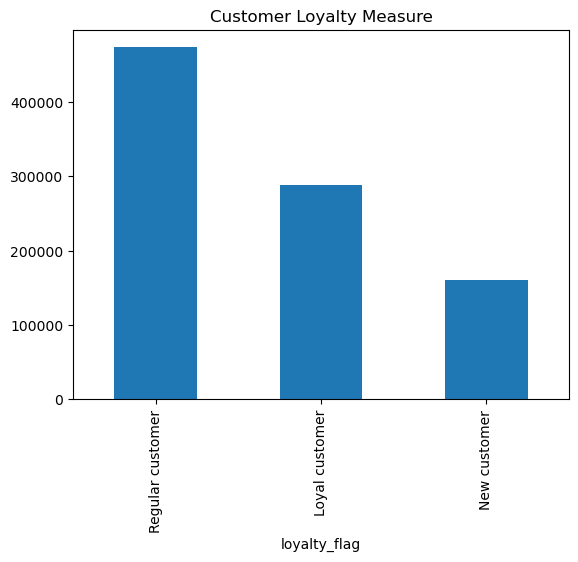

In [16]:
loyalty_bar = df['loyalty_flag'].value_counts().plot.bar(title = 'Customer Loyalty Measure')

In [17]:
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_loyalty_measure.png'))

In [18]:
loyalty_flag_departments = pd.crosstab(df['department'],df['loyalty_flag'], dropna = False)

In [19]:
loyalty_flag_departments

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,1921,1759,4496
babies,7665,2303,8768
bakery,4186,2762,7630
beverages,29494,16391,48614
breakfast,9181,5288,15262
bulk,877,391,1221
canned goods,16496,11887,32050
dairy eggs,71964,31765,104270
deli,6175,3897,11188


In [20]:
loyalty_flag_departments = pd.crosstab(df['department'], df['loyalty_flag'], dropna=False)

In [21]:
loyalty_flag_departments = loyalty_flag_departments[['Loyal customer', 'New customer', 'Regular customer']]

Text(0.5, 1.0, 'Ordering Habits based on Customer Loyalty')

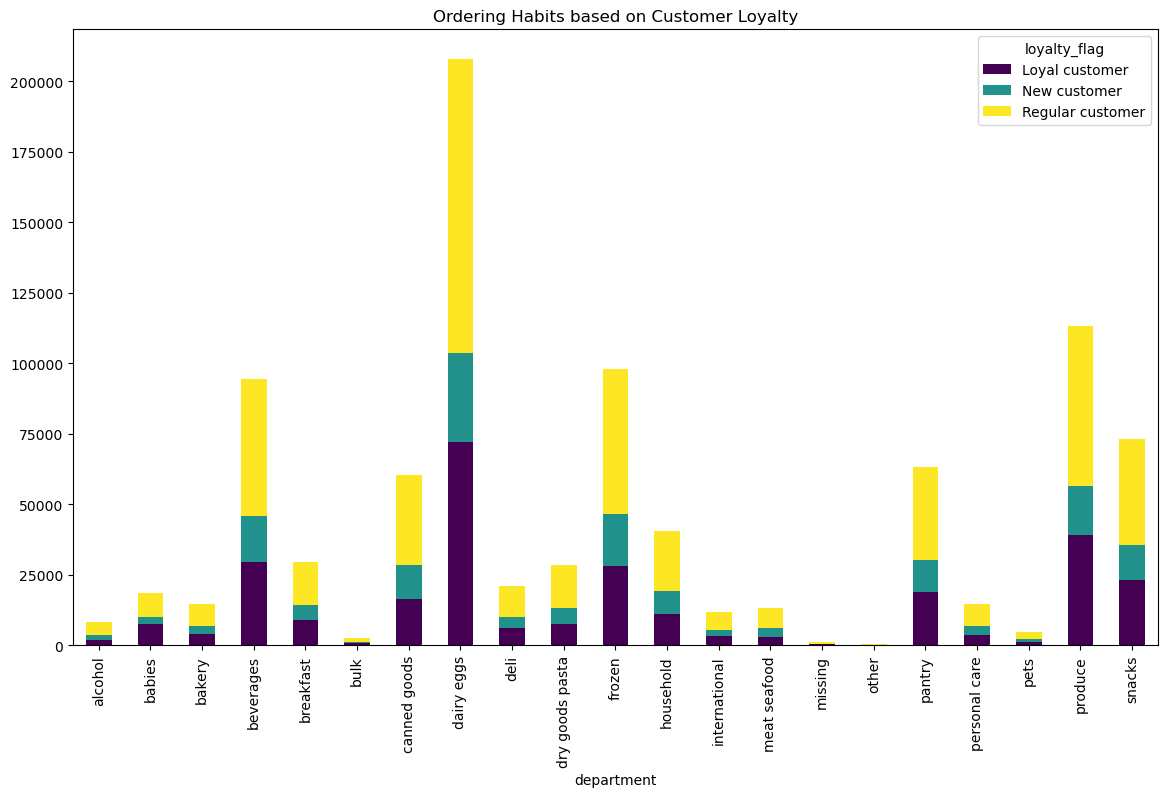

In [27]:
loyalty_flag_departments.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Ordering Habits based on Customer Loyalty')

In [28]:
loyalty_flag_region = pd.crosstab(df['region'],df['loyalty_flag'], dropna = False)

In [29]:
loyalty_flag_region

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,66587,37905,111096
Northeast,52857,27693,82441
South,93566,53103,160118
West,74907,41582,119415


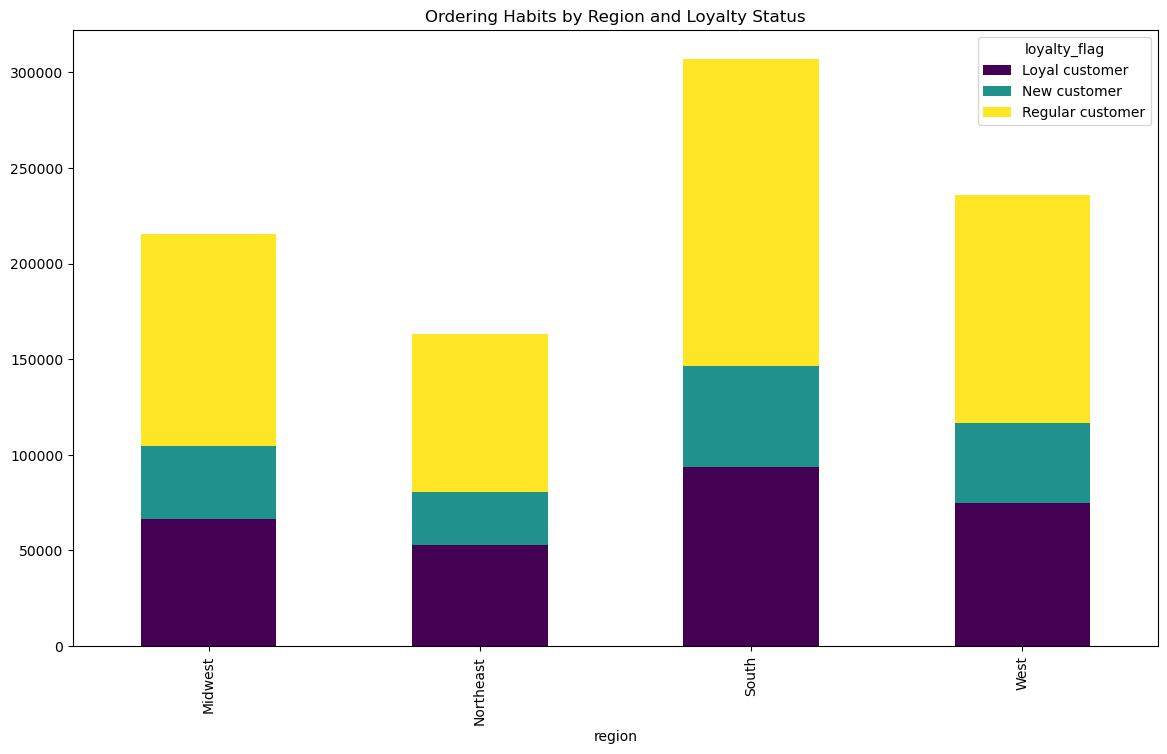

In [31]:
loyalty_flag_region = pd.crosstab(df['region'], df['loyalty_flag'], dropna=False)
loyalty_flag_region = loyalty_flag_region[['Loyal customer', 'New customer', 'Regular customer']]
loyalty_flag_region.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Ordering Habits by Region and Loyalty Status')
plt.show()

In [33]:
age_family_profile = pd.crosstab(df['age_group'],df['family_profile'], dropna = False)

In [34]:
age_family_profile

family_profile,married female with children,married male with children,single female with children,"single female, no children",single male with children,"single male, no children"
age_group,,,,,,
18-29 years old,42104,43808,21590,21406,23160,21825
30-44 years old,79985,79441,0,27163,0,27125
45-59 years old,82744,81523,0,27418,0,27764
60-81 years old,116234,119363,0,39405,0,39212


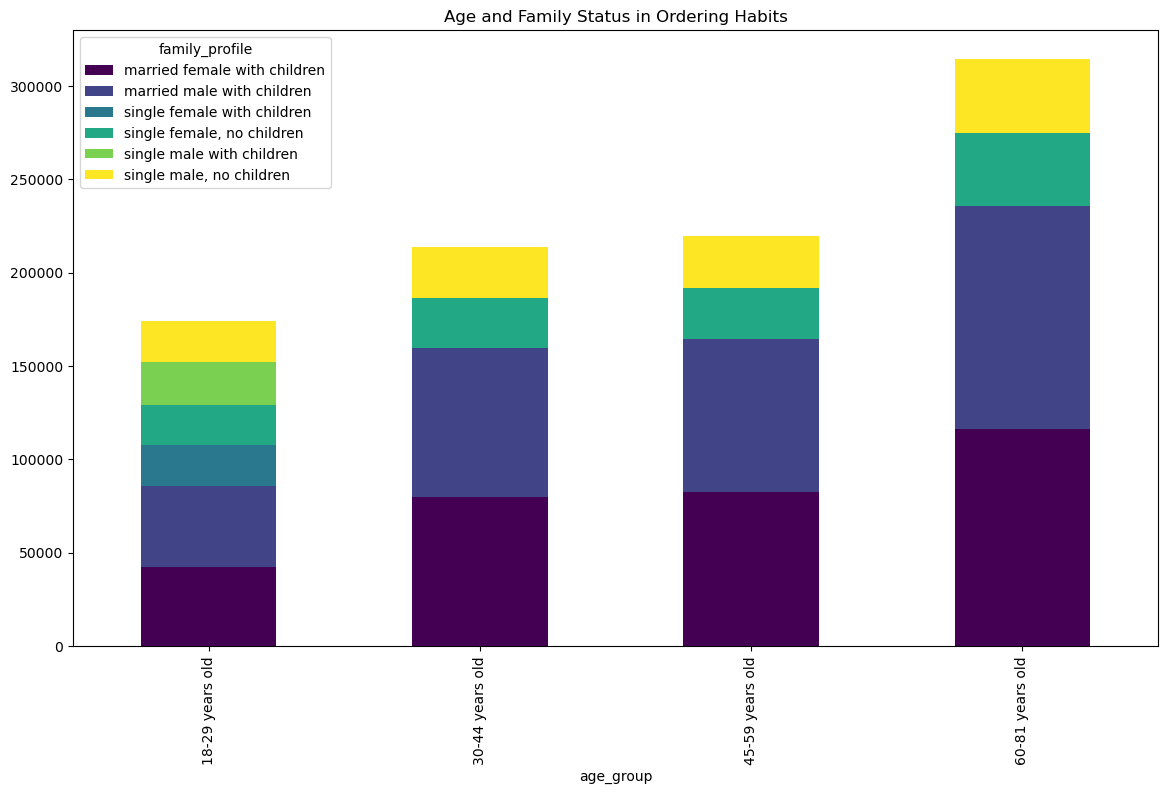

In [35]:
age_family_crosstab = pd.crosstab(df['age_group'], df['family_profile'], dropna=False)
age_family_crosstab = age_family_crosstab[['married female with children', 'married male with children', 'single female with children', 'single female, no children', 'single male with children', 'single male, no children']]
age_family_crosstab.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Age and Family Status in Ordering Habits')
plt.show()

C:\Users\repla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\repla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


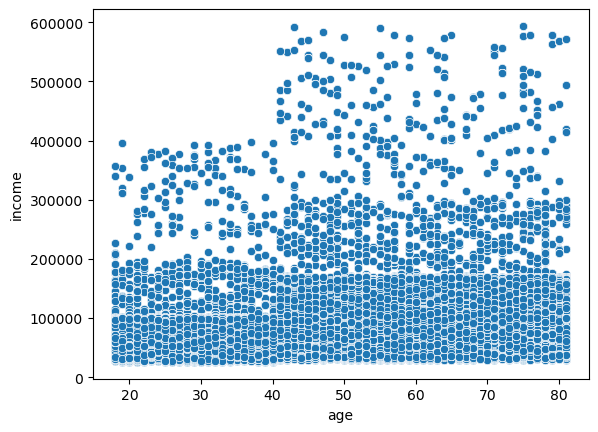

In [36]:
age_income_scatterplot = sns.scatterplot(x = 'age', y = 'income', data = df)